In [38]:
# 1) Install
!apt-get -y install -qq libgl1
!pip install -q face_recognition opencv-python-headless

In [39]:
from google.colab import files
import os

# Create folder for known people
os.makedirs("register", exist_ok=True)

print("📸 Upload one or more images for registration (filenames = person's name)")
uploaded = files.upload()

for fn in uploaded.keys():
    os.rename(fn, f"register/{fn}")
print("✅ Registration images saved in 'register/'")


📸 Upload one or more images for registration (filenames = person's name)


Saving raju.jpg to raju.jpg
✅ Registration images saved in 'register/'


In [40]:
from google.colab import files, os

print("📸 Upload more face images to add to register (filenames = person's name)")
uploaded = files.upload()

for fn in uploaded.keys():
    os.rename(fn, f"register/{fn}")
print("✅ Added to register:", list(uploaded.keys()))


📸 Upload more face images to add to register (filenames = person's name)


Saving image001 (1).png to image001 (1).png
✅ Added to register: ['image001 (1).png']


In [49]:
print("📸 Upload the probe image (the face you want to identify)")
uploaded2 = files.upload()

probe_path = list(uploaded2.keys())[0]
os.rename(probe_path, f"probe_{probe_path}")
print(f"✅ Probe image saved as probe_{probe_path}")


📸 Upload the probe image (the face you want to identify)


Saving raju.jpg to raju.jpg
✅ Probe image saved as probe_raju.jpg


—— Dashboard ——
Probe image: probe_raju.jpg


,person,identity,distance
0,raju,register/raju.jpg,0.05461
1,meena_2,register/meena_2.jpg,0.05461


✅ This picture is of: **raju** (distance=0.055)


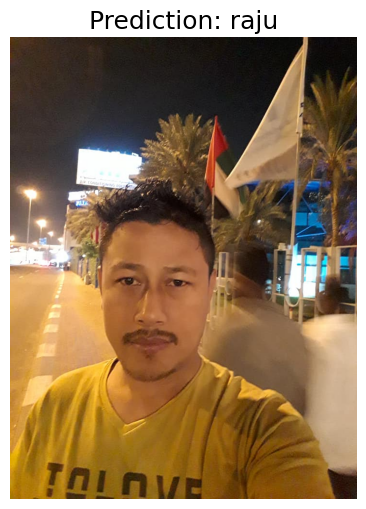

In [50]:
from deepface import DeepFace
import os, cv2, matplotlib.pyplot as plt, pandas as pd, glob

MODEL = "ArcFace"
DETECTOR = "retinaface"
DIST = "cosine"
THRESHOLD = 0.40  # try 0.35–0.45

df = DeepFace.find(
    img_path=f"probe_{probe_path}",
    db_path="register",
    model_name=MODEL,
    detector_backend=DETECTOR,
    distance_metric=DIST,
    enforce_detection=False,
    silent=True
)

print("—— Dashboard ——")
print(f"Probe image: probe_{probe_path}")

if len(df)==0 or df[0].empty:
    match_name, match_dist, is_match = "Unknown", None, False
else:
    res = df[0].copy()
    res["person"] = res["identity"].apply(lambda p: os.path.splitext(os.path.basename(p))[0])
    display(res[["person","identity","distance"]].head(3))  # see top-3
    best = res.iloc[0]
    match_name = best["person"]
    match_dist = float(best["distance"])
    is_match = match_dist <= THRESHOLD

if is_match:
    print(f"✅ This picture is of: **{match_name}** (distance={match_dist:.3f})")
else:
    print(f"❌ No good match (best={match_name}, distance={match_dist}) → Predict: Unknown")
    match_name = "Unknown"

img = cv2.imread(f"probe_{probe_path}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6)); plt.imshow(img); plt.axis("off")
plt.title(f"Prediction: {match_name}", fontsize=18); plt.show()


In [23]:
# Example: verify against a specific person
result = DeepFace.verify(f"register/{os.listdir('register')[0]}", f"probe_{probe_path}", enforce_detection=False)
print(result)


{'verified': True, 'distance': -0.0, 'threshold': 0.68, 'confidence': 100, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 118, 'y': 374, 'w': 345, 'h': 345, 'left_eye': (342, 512), 'right_eye': (245, 509)}, 'img2': {'x': 118, 'y': 374, 'w': 345, 'h': 345, 'left_eye': (342, 512), 'right_eye': (245, 509)}}, 'time': 2.77}
